## Bi-grams

### Set Up

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('omw-1.4')
import string
import re
import unicodedata
import warnings
warnings.filterwarnings("ignore")
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from string import punctuation
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import ngrams
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix

### Load Data

In [2]:
review_data = pd.read_csv("./Data/review_chinsese_philadelphia.csv")

# removing the duplicates
review_data.drop_duplicates(subset=['review_id','date','user_id'],inplace=True)
review_data.set_index('Unnamed: 0')
review_data.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,1,L0E_Ld__jIATsQ1vA7ZGZw,Cvi8nZTwDVaQkqmmgQwQMw,D4DZztR7vkbiED6txGUYFg,4,0,0,1,Looks like there is a second Red Kings restaur...,2013-06-24 13:15:21
1,2,Vou3XAgjYJBuCO_-h1OQaA,M-00xuAOYLeaGEhPmmKjfg,eaDZlSuVS0EY67Ke6pRP6Q,5,0,0,0,Absolutely wonderful food & service! Go there ...,2011-04-23 00:52:05
2,3,hozoa1DsTCjpz4UC8YGsNw,ndgHYecgAWEqtjnjE7LtfA,MMRRS6YhVRx_iN5-JhMRYg,4,0,0,0,The new Han Dynasty took over the spot where t...,2012-10-08 15:29:44
3,4,tfucaiy6lG5UbvbmTD4STg,wABHp4fGUC-0acRKhmQO2A,MMRRS6YhVRx_iN5-JhMRYg,5,0,0,0,"Awesome food, great place to split a bunch of ...",2016-03-07 00:22:02
4,5,bu0BUkenT8c8nnyKUaF0-A,qmpRRF4HAKuGJEujoK-IdQ,eaDZlSuVS0EY67Ke6pRP6Q,5,0,0,0,"I've been coming to this place for years now, ...",2016-02-24 14:34:27


### Clean Data

In [3]:
stopwords = nltk.corpus.stopwords.words('english')
lemmatizer = WordNetLemmatizer()
token=[]
bigrm=[]
for comment in review_data.text:
    text=comment.lower()
    text=unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    text=re.sub(r'[^a-zA-Z0-9]', ' ', text)
    text=re.sub(r'https?://\S+|www\.\S+', '', text)
    text=re.sub(r'[^a-zA-Z]', ' ', text)
    text=re.sub(r'^\s*|\s\s*', ' ', text).strip()
    text=text.split()
    tokens=[lemmatizer.lemmatize(i) for i in text if (i not in string.punctuation)&(i not in stopwords)]
    token.append(tokens)
    tokens=list(nltk.bigrams(tokens))
    tokens=[i[0]+"_"+i[1] for i in tokens]
    bigrm.append(tokens)
review_data["unigram"]=token
review_data["bigram"]=bigrm

In [4]:
review_data.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,unigram,bigram
0,1,L0E_Ld__jIATsQ1vA7ZGZw,Cvi8nZTwDVaQkqmmgQwQMw,D4DZztR7vkbiED6txGUYFg,4,0,0,1,Looks like there is a second Red Kings restaur...,2013-06-24 13:15:21,"[look, like, second, red, king, restaurant, ch...","[look_like, like_second, second_red, red_king,..."
1,2,Vou3XAgjYJBuCO_-h1OQaA,M-00xuAOYLeaGEhPmmKjfg,eaDZlSuVS0EY67Ke6pRP6Q,5,0,0,0,Absolutely wonderful food & service! Go there ...,2011-04-23 00:52:05,"[absolutely, wonderful, food, service, go, lun...","[absolutely_wonderful, wonderful_food, food_se..."
2,3,hozoa1DsTCjpz4UC8YGsNw,ndgHYecgAWEqtjnjE7LtfA,MMRRS6YhVRx_iN5-JhMRYg,4,0,0,0,The new Han Dynasty took over the spot where t...,2012-10-08 15:29:44,"[new, han, dynasty, took, spot, old, mid, atla...","[new_han, han_dynasty, dynasty_took, took_spot..."
3,4,tfucaiy6lG5UbvbmTD4STg,wABHp4fGUC-0acRKhmQO2A,MMRRS6YhVRx_iN5-JhMRYg,5,0,0,0,"Awesome food, great place to split a bunch of ...",2016-03-07 00:22:02,"[awesome, food, great, place, split, bunch, de...","[awesome_food, food_great, great_place, place_..."
4,5,bu0BUkenT8c8nnyKUaF0-A,qmpRRF4HAKuGJEujoK-IdQ,eaDZlSuVS0EY67Ke6pRP6Q,5,0,0,0,"I've been coming to this place for years now, ...",2016-02-24 14:34:27,"[coming, place, year, even, though, live, colo...","[coming_place, place_year, year_even, even_tho..."


In [5]:
comm_clean=[]
for l in token:
    if l:
        comm=" ".join(l)
        comm_clean.append(comm)
comm_clean[0:5]

['look like second red king restaurant chinatown disappoint since place opened yesterday exactly sure replacing red king street second helping spicy szechuan food ordered takeout picked dan dan noodle shredded pork garlic sauce dish spice level dish perfect extremely mouth burning delicious flavor sweet earthy fresh portion generous make great leftover u wait try dish come back sit dinner also karaoke room upstairs plus byob',
 'absolutely wonderful food service go lunch dinner boyfriend least every two week price much reasonable weekend get pretty packed may wait little bit never issue u always get indian pancake hainanese chicken curry chicken dish delicious well never get tired',
 'new han dynasty took spot old mid atlantic restaurant unchanging menu like han dynasty lot one olde city even give maybe biased love service always nice came check make small conversation heard peanut allergy even though peanut dish ordered think han sister han dynasty time month number time note though d

## Tf-idf

In [6]:
tfidf = TfidfVectorizer(ngram_range=(1,2),stop_words = 'english')
TFIDF = tfidf.fit_transform(comm_clean)

In [7]:
word = tfidf.get_feature_names_out()

In [13]:
TFIDF

<56908x977101 sparse matrix of type '<class 'numpy.float64'>'
	with 4753093 stored elements in Compressed Sparse Row format>

### Distribution of All Non-zero Scores

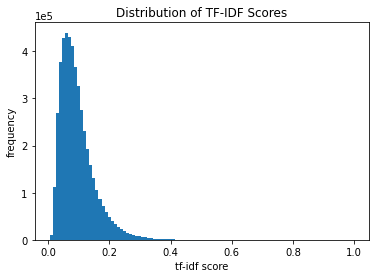

In [24]:
A = csr_matrix(TFIDF)
plt.hist(A.data, bins = 100)
plt.xlabel("tf-idf score")
plt.ylabel("frequency")
plt.ticklabel_format(style="sci",scilimits=(0,2),axis="y")
plt.title("Distribution of TF-IDF Scores")
plt.show()

In [9]:
len(A.data)

4753093

In [15]:
1-47530938/(56908*977101)

0.9991452017893686

## LDA Model Implementation

In [25]:
from gensim import corpora
import pickle
import gensim
from gensim.test.utils import datapath
import pyLDAvis
import pyLDAvis.gensim_models
import os

### Compound Model with Bigrams and Unigrams

In [39]:
review_data["text_data"]=review_data["bigram"]+review_data["unigram"]

In [40]:
dictionary=corpora.Dictionary(review_data["text_data"])
corpus=[dictionary.doc2bow(text) for text in review_data["text_data"]]
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 3), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


In [41]:
## save the dictionary and corpus for future use
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

In [42]:
# parallelized Latent Dirichlet Allocation
num_topics=3
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=dictionary,
                                       num_topics=num_topics)

In [43]:
# save&load the model
lda_model.save('model3_compound.gensim')
# from gensim import models
# lda_model = models.ldamodel.LdaModel.load('model3.gensim')

In [44]:
for idx, topic in lda_model.show_topics(formatted=False, num_words= 10):
    print('Topic: {} \nWords: {}'.format(idx, '|'.join([w[0] for w in topic])))

Topic: 0 
Words: food|place|good|like|noodle|chicken|great|soup|dish|dumpling
Topic: 1 
Words: food|place|good|great|time|restaurant|dumpling|get|soup|service
Topic: 2 
Words: food|place|good|time|noodle|one|restaurant|dish|go|like


In [45]:
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.getcwd()
LDAvis_data_filepath+="\\Results\\LDA\\ldavis_prepared_"
LDAvis_data_filepath+=str(num_topics)
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_bi_'+ str(num_topics) +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.000303 -0.006466       1        1  41.058495
0     -0.005873  0.003477       2        1  36.112409
1      0.006177  0.002989       3        1  22.829096, topic_info=          Term          Freq         Total Category  logprob  loglift
40       great  17558.000000  17558.000000  Default  30.0000  30.0000
1171  dumpling  14234.000000  14234.000000  Default  29.0000  29.0000
326       time  17308.000000  17308.000000  Default  28.0000  28.0000
2         back  10531.000000  10531.000000  Default  27.0000  27.0000
651       rice   9701.000000   9701.000000  Default  26.0000  26.0000
...        ...           ...           ...      ...      ...      ...
0         also   2485.876518  13040.458290   Topic3  -6.3156  -0.1803
344    chinese   2532.182445  14195.418697   Topic3  -6.2972  -0.2467
798      order   2364.430376  12816.053640   Topic3  -6.3657  -0.2130
647     really   2369.014273  13435.744080   Topic3  -6.3638  -0.2583
130    chicken   2152.106529  14293.707627   Topic3  -6.4598  -0.4162

[287 rows x 6 columns], token_table=        Topic      Freq              Term
term                                     
122         1  0.555224        absolutely
122         2  0.309503        absolutely
122         3  0.135408        absolutely
649178      2  0.726587   actually_poured
304269      1  0.825207  affordably_price
...       ...       ...               ...
210662      3  0.822077         work_crew
390524      1  0.688610    worth_standing
836         1  0.371296             would
836         2  0.358671             would
836         3  0.270041             would

[464 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2])

### Model Only Use Bigrams

In [46]:
review_data["text_data"]=review_data["bigram"]

In [47]:
dictionary=corpora.Dictionary(review_data["text_data"])
corpus=[dictionary.doc2bow(text) for text in review_data["text_data"]]
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


In [48]:
# parallelized Latent Dirichlet Allocation
num_topics=3
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=dictionary,
                                       num_topics=num_topics)

In [49]:
# save&load the model
lda_model.save('model3_bigram.gensim')
# from gensim import models
# lda_model = models.ldamodel.LdaModel.load('model3.gensim')

In [50]:
for idx, topic in lda_model.show_topics(formatted=False, num_words= 10):
    print('Topic: {} \nWords: {}'.format(idx, '|'.join([w[0] for w in topic])))

Topic: 0 
Words: dim_sum|soup_dumpling|chinese_food|fried_rice|noodle_soup|pretty_good|scallion_pancake|go_back|dan_dan|hot_pot
Topic: 1 
Words: dim_sum|chinese_food|soup_dumpling|fried_rice|dan_dan|dan_noodle|noodle_soup|hot_pot|come_back|happy_hour
Topic: 2 
Words: soup_dumpling|dan_dan|chinese_food|dim_sum|fried_rice|dan_noodle|food_good|noodle_soup|hot_pot|first_time


In [51]:
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.getcwd()
LDAvis_data_filepath+="\\Results\\LDA\\ldavis_prepared_"
LDAvis_data_filepath+=str(num_topics)
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_bi_'+ str(num_topics) +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.013864  0.002501       1        1  37.710292
1      0.004670 -0.012749       2        1  31.799911
2      0.009194  0.010247       3        1  30.489797, topic_info=                     Term         Freq        Total Category  logprob  loglift
2667              dim_sum  5494.000000  5494.000000  Default  30.0000  30.0000
5                 dan_dan  2589.000000  2589.000000  Default  29.0000  29.0000
5486           happy_hour  1373.000000  1373.000000  Default  28.0000  28.0000
20162          hand_drawn   914.000000   914.000000  Default  27.0000  27.0000
2006            food_good  1566.000000  1566.000000  Default  26.0000  26.0000
...                   ...          ...          ...      ...      ...      ...
473               go_back   418.780023  1645.048133   Topic3  -7.6834  -0.1804
585      highly_recommend   363.940641  1288.803601   Topic3  -7.8237  -0.0767
197    chinese_restaurant   410.456009  1682.896985   Topic3  -7.7035  -0.2232
1205           great_food   327.421908  1130.590404   Topic3  -7.9295  -0.0515
639      scallion_pancake   360.458084  1660.685614   Topic3  -7.8334  -0.3398

[295 rows x 6 columns], token_table=        Topic      Freq              Term
term                                     
424032      1  0.649481         abel_best
169527      1  0.804756     accept_coupon
287765      1  0.677208  affordably_price
335322      1  0.195452       almost_many
335322      2  0.781808       almost_many
...       ...       ...               ...
1666        2  0.389690   would_recommend
1666        3  0.238282   would_recommend
404020      1  0.226022       yes_deliver
404020      2  0.678066       yes_deliver
484459      2  0.821078      yummy_greasy

[468 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

### Customized LDA Model for Selected Business
#### Use the Business with most reviews as an example

In [36]:
df = review_data.groupby(['business_id'])['text_data'].count().sort_values(ascending=False)
df

business_id
ytynqOUb3hjKeJfRj5Tshw    5778
AGlh4ZDv6jnoiYfz7At9mw    2778
ntiIq1FNqduOyyowMFGh5A    2255
kZ1q0K13tFYG_ZJrVvsJHA    2076
nIAbuktMEzVjT4P9pG89rQ    1593
                          ... 
GXhExRdP5UUDhoxTRWQfcw       5
qU_CC7nJ-rOfCusuapOW8g       5
Faqzugp5aAc9-XOjfOsDGA       5
BDJe5GnHM__g0YyfZS3DkQ       5
hVkhd9wlT7ZWvGCYiMM0KQ       5
Name: text_data, Length: 471, dtype: int64

In [ ]:
busid = df.index[0]

In [20]:
df = review_data.loc[review_data['business_id'] == busid]
dictionary=corpora.Dictionary(df["text_data"])
corpus=[dictionary.doc2bow(text) for text in df["text_data"]]
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)]


In [23]:
# parallelized Latent Dirichlet Allocation
num_topics=3
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=dictionary,
                                       num_topics=num_topics)

In [24]:
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.getcwd()
LDAvis_data_filepath+="\\Results\\LDA\\ldavis_prepared_"
LDAvis_data_filepath+=str(num_topics)
LDAvis_data_filepath+=busid
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) + busid + '.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.004500  0.007482       1        1  39.384074
1     -0.004947 -0.007250       2        1  37.465454
0      0.009447 -0.000233       3        1  23.150471, topic_info=            Term         Freq        Total Category  logprob  loglift
70           one  1331.000000  1331.000000  Default  30.0000  30.0000
0           food  3600.000000  3600.000000  Default  29.0000  29.0000
106         best   901.000000   901.000000  Default  28.0000  28.0000
7           love  1280.000000  1280.000000  Default  27.0000  27.0000
631         like  1087.000000  1087.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
374      reading   243.535660  1445.634315   Topic3  -6.0909  -0.3179
1098        also   174.406226   833.455710   Topic3  -6.4247  -0.1010
389     sandwich   175.737950   868.603527   Topic3  -6.4171  -0.1347
766   everything   171.347565   898.363347   Topic3  -6.4424  -0.1937
138          eat   166.375698  1096.558336   Topic3  -6.4719  -0.4225

[292 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
1098       1  0.389943     also
1098       2  0.400741     also
1098       3  0.208769     also
655        1  0.453845  amazing
655        2  0.391553  amazing
...      ...       ...      ...
1315       3  0.148917      wow
42005      1  0.228078  wow_wow
42005      2  0.684235  wow_wow
42005      3  0.114039  wow_wow
36654      1  0.809956      yiu

[445 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1])

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.008512 -0.002798       1        1  37.178573
1      0.006787 -0.005657       2        1  32.840598
2      0.001724  0.008455       3        1  29.980829, topic_info=       Term         Freq        Total Category  logprob  loglift
70      one  1356.000000  1356.000000  Default  30.0000  30.0000
151   fresh  1165.000000  1165.000000  Default  29.0000  29.0000
4     great  1752.000000  1752.000000  Default  28.0000  28.0000
631    like  1088.000000  1088.000000  Default  27.0000  27.0000
62    lunch   798.000000   798.000000  Default  26.0000  26.0000
..      ...          ...          ...      ...      ...      ...
425     try   232.232105   778.861884   Topic3  -6.3969  -0.0055
615   amish   227.401206   755.632487   Topic3  -6.4180   0.0038
151   fresh   269.601456  1165.223051   Topic3  -6.2477  -0.2591
422    time   269.728956  1301.404099   Topic3  -6.2473  -0.3692
23   cheese   221.730447   800.442469   Topic3  -6.4432  -0.0791

[278 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
1098      1  0.384175    also
1098      2  0.287222    also
1098      3  0.328427    also
504       1  0.426754  always
504       2  0.340742  always
...     ...       ...     ...
96        2  0.289938   worth
96        3  0.248167   worth
1183      1  0.439559   would
1183      2  0.281189   would
1183      3  0.279573   would

[413 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

In [ ]:
review_data.to_csv(index=False)